In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import  EarlyStopping
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv("D:/Labs/creditcard.csv",sep=",")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
minMaxScaler = MinMaxScaler()
df_enc = pd.DataFrame(minMaxScaler.fit_transform(df))
df_enc.shape

(284807, 31)

In [4]:
x = df_enc
y = pd.DataFrame(df['Class'],columns=['Class'])

In [5]:
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size = 0.33)
yTrain = pd.get_dummies(data=yTrain,columns =['Class'])
yTest = pd.get_dummies(data=yTest,columns =['Class'])

In [8]:
model_nn = keras.Sequential([keras.layers.Dense(4,kernel_initializer = 'he_uniform',input_shape=(31,),activation = 'relu'),
                            keras.layers.Dense(3,kernel_initializer = 'he_uniform',activation = 'relu'),
                            keras.layers.Dense(5,kernel_initializer = 'he_uniform',activation = 'relu'),
                            keras.layers.Dense(2,kernel_initializer = 'glorot_uniform',activation = 'sigmoid'),
                            ])

es = EarlyStopping(patience=3,restore_best_weights= True)

model_nn.compile(loss = "binary_crossentropy",metrics = ['accuracy'],optimizer = 'Adam')
history = model_nn.fit(xTrain,yTrain,validation_data = (xTest,yTest),epochs = 5, callbacks = es)

Epoch 1/5
5964/5964 [==============================] - 12s 2ms/step - loss: 0.0092 - accuracy: 0.9986 - val_loss: 9.7090e-04 - val_accuracy: 0.9999
Epoch 2/5
5964/5964 [==============================] - 11s 2ms/step - loss: 3.6231e-04 - accuracy: 1.0000 - val_loss: 6.4492e-05 - val_accuracy: 1.0000
Epoch 3/5
5964/5964 [==============================] - 12s 2ms/step - loss: 3.9869e-05 - accuracy: 1.0000 - val_loss: 6.4149e-06 - val_accuracy: 1.0000
Epoch 4/5
5964/5964 [==============================] - 12s 2ms/step - loss: 1.8638e-05 - accuracy: 1.0000 - val_loss: 1.8629e-06 - val_accuracy: 1.0000
Epoch 5/5
5964/5964 [==============================] - 11s 2ms/step - loss: 1.2188e-06 - accuracy: 1.0000 - val_loss: 4.1106e-07 - val_accuracy: 1.0000


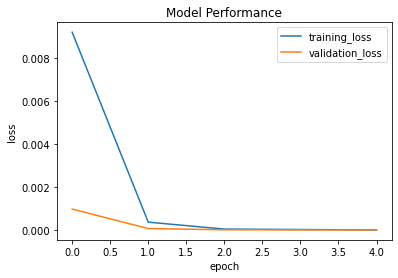

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Performance')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'validation_loss'], loc='upper right')
plt.show()